# Proposition 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def compute_x_y(params):
    params['x_1'] = 1 / (1 + params['w'] * (1 - params['p_1']))
    params['y_1'] = 1 / (1 + params['w'])

def compute_lambda(params):
    params['lambda^_*'] = ((1 + params['w']) - 1/params['delta']) / params['p_1'] / params['w']

def compute_eta(params):
    params['eta^*'] = params['C_cyb'] / params['p_1'] / params['beta']

## $\lambda^*$ as a function of $\delta$ with different values of $p_1$

In [ ]:
def plot_lambda_vs_delta():
    # Define values of p1 and markers for plotting
    p1_values = [0.7, 0.8, 0.9]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\lambda^*$ as a function of $\delta$ with different values of $p_1$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999),
        'C_cyb': random.uniform(0.001, 0.999)
    }

    for i, p_1 in enumerate(p1_values):
        # Set p1 value
        params['p_1'] = p_1

        # Ensure beta and C_cyb satisfy a condition
        while params['beta'] <= params['C_cyb'] / params['p_1']:
            params['beta'] = random.uniform(0.001, 0.999)
            params['C_cyb'] = random.uniform(0.001, 0.999)

        # Set a random p2 value within a range
        params['p_2'] = random.uniform(0.001, params['p_1'] - 0.001)

        # Compute x and y values based on parameters
        compute_x_y(params)

        # Generate a range of delta values
        delta_range = np.linspace(params['y_1'] + 0.001, params['x_1'] - 0.001, 100)
        lambda_values = []

        # Calculate lambda values for each delta in the range
        for delta in delta_range:
            params['delta'] = delta
            compute_lambda(params)
            lambda_values.append(params['lambda^_*'])

        # Plot lambda values with a label and marker
        ax.plot(delta_range, lambda_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that an insider is malicious ($\delta$)')
    ax.set_ylabel('$\lambda^*$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
plot_lambda_vs_delta()

## $\lambda^*$ as a function of $\beta$ with different values of $C_{cyb}$

In [ ]:
def plot_eta_vs_beta():
    # Define the fixed p1 value and markers for plotting
    p1_values = 0.7
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\eta^*$ as a function of $\\beta$ with different values of $C_{cyb}$ ($p_1$ = 0.7)')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'p_1': p1_values
    }

    C_cybs = [0.2, 0.3, 0.4]
    for i, c_i in enumerate(C_cybs):
        # Set C_cyb value
        params['C_cyb'] = c_i

        # Generate a range of beta values
        beta_ranges = np.linspace(params['C_cyb'] / params['p_1'], 0.999, 100)

        # Set a random p2 value within a range
        params['p_2'] = random.uniform(0.001, params['p_1'] - 0.001)

        # Compute x and y values based on parameters
        compute_x_y(params)

        # Set a random delta value within a range
        params["delta"] = random.uniform(0.001, 0.999)

        eta_values = []

        # Calculate eta values for each beta in the range
        for b in beta_ranges:
            params["beta"] = b
            compute_eta(params)
            eta_values.append(params['eta^*'])

        # Plot eta values with a label and marker
        ax.plot(beta_ranges, eta_values, label=f'$C_{{cyb}}$={c_i:.2f}', marker=markers[i], markevery=10)

    ax.set_xlabel('$\\beta$')
    ax.set_ylabel('$\eta^*$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
plot_eta_vs_beta()

## $\eta^*$ as a function of $C_{cyb}$ with different values of $p_1$

In [ ]:
def plot_eta_vs_C_cyb_with_p2():
    # Define sample p1 values and markers for plotting
    p1_values = [0.2, 0.4, 0.6]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\eta^*$ as a function of $C_{cyb}$ with different values of $p_1$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999)
    }

    C_cyb_range = np.linspace(0.001, 0.999, 200)

    for i, p_1 in enumerate(p1_values):
        # Set p1 value
        params['p_1'] = p_1

        # Compute x and y values based on parameters
        compute_x_y(params)

        # Set a random delta value within a range
        params['delta'] = random.uniform(params['y_1'] + 0.001, params['x_1'] - 0.001)

        eta_values = []

        for C_cyb in C_cyb_range:
            params['C_cyb'] = C_cyb
            if params['beta'] > params['C_cyb'] / params['p_1']:
                compute_lambda(params)
                compute_eta(params)
                eta_values.append(params['eta^*'])
            else:
                eta_values.append(np.nan)  # Appending NaN for continuity

        # Plot eta values with a label and marker
        ax.plot(C_cyb_range, eta_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Cost of cyber attack $(C_{cyb})$')
    ax.set_ylabel('$\eta^*$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_eta_vs_C_cyb_with_p2()

## Figure 5: $\lambda^*$ as a function of $\delta$ with different values of $p_1$

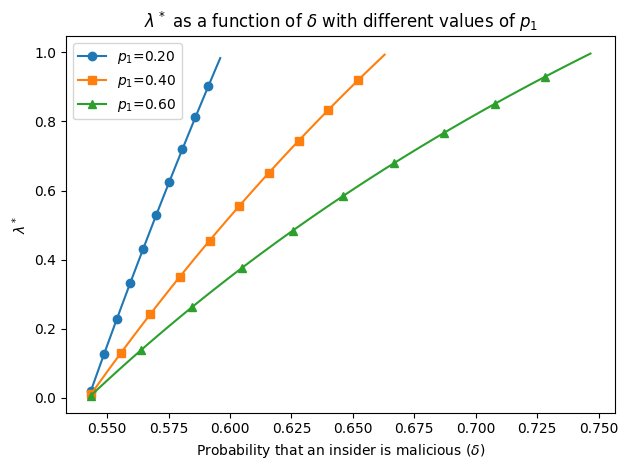

In [ ]:
def plot_lambda_vs_delta():
    # Define sample p1 values and markers for plotting
    p1_values = [0.2, 0.4, 0.6]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\lambda^*$ as a function of $\delta$ with different values of $p_1$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999),
        'C_cyb': random.uniform(0.001, 0.999)
    }

    for i, p_1 in enumerate(p1_values):
        # Set p1 value
        params['p_1'] = p_1

        # Ensure beta and C_cyb satisfy a condition
        while params['beta'] <= params['C_cyb'] / params['p_1']:
            params['beta'] = random.uniform(0.001, 0.999)
            params['C_cyb'] = random.uniform(0.001, 0.999)

        # Compute x and y values based on parameters
        compute_x_y(params)

        # Generate a range of delta values
        delta_range = np.linspace(params['y_1'] + 0.001, params['x_1'] - 0.001, 100)
        lambda_values = []

        # Calculate lambda values for each delta in the range
        for delta in delta_range:
            params['delta'] = delta
            compute_lambda(params)
            lambda_values.append(params['lambda^_*'])

        # Plot lambda values with a label and marker
        ax.plot(delta_range, lambda_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that an insider is malicious ($\delta$)')
    ax.set_ylabel('$\lambda^*$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
plot_lambda_vs_delta()


##Figure 6: 1-$\lambda^*$ as a function of $\delta$ with different values of $p_1$

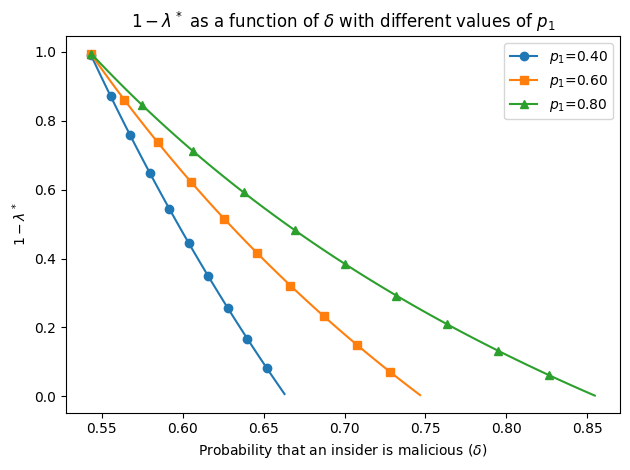

In [ ]:
def plot_one_minus_lambda_vs_delta():
    # Define sample p1 values and markers for plotting
    p1_values = [0.4, 0.6, 0.8]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$1-\lambda^*$ as a function of $\delta$ with different values of $p_1$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999),
        'C_cyb': random.uniform(0.001, 0.999)
    }

    for i, p_1 in enumerate(p1_values):
        # Set p1 value
        params['p_1'] = p_1

        # Ensure beta and C_cyb satisfy a condition
        while params['beta'] <= params['C_cyb'] / params['p_1']:
            params['beta'] = random.uniform(0.001, 0.999)
            params['C_cyb'] = random.uniform(0.001, 0.999)

        # Compute x and y values based on parameters
        compute_x_y(params)

        # Generate a range of delta values
        delta_range = np.linspace(params['y_1'] + 0.001, params['x_1'] - 0.001, 100)
        one_minus_lambda_values = []

        # Calculate 1 - lambda values for each delta in the range
        for delta in delta_range:
            params['delta'] = delta
            compute_lambda(params)
            one_minus_lambda_values.append(1 - params['lambda^_*'])

        # Plot 1 - lambda values with a label and marker
        ax.plot(delta_range, one_minus_lambda_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that an insider is malicious ($\delta$)')
    ax.set_ylabel('$1-\lambda^*$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_one_minus_lambda_vs_delta()


##Figure 7: $\eta^*$ as a function of $C_{cyb}$ with different values of $p_1$

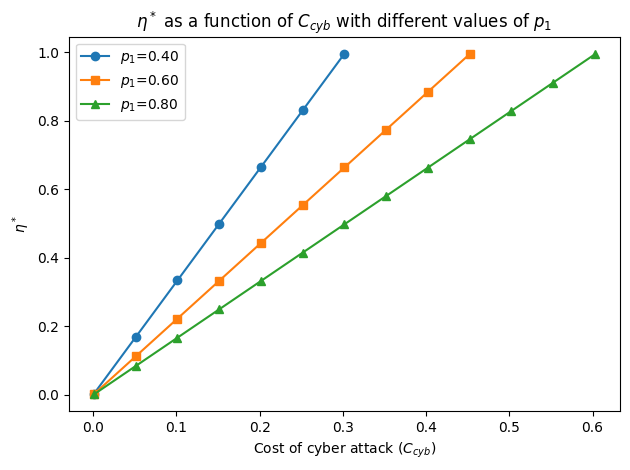

In [ ]:
def plot_eta_vs_C_cyb():
    # Define sample p1 values and markers for plotting
    p1_values = [0.4, 0.6, 0.8]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\eta^*$ as a function of $C_{cyb}$ with different values of $p_1$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999)
    }

    C_cyb_range = np.linspace(0.001, 0.999, 200)

    for i, p_1 in enumerate(p1_values):
        # Set p1 value
        params['p_1'] = p_1

        # Set a random p2 value within a range
        params['p_2'] = random.uniform(0.001, params['p_1'] - 0.001)

        # Compute x and y values based on parameters
        compute_x_y(params)
        # Set a random delta value within a range
        params['delta'] = random.uniform(params['y_1'] + 0.001, params['x_1'] - 0.001)

        eta_values = []

        for C_cyb in C_cyb_range:
            params['C_cyb'] = C_cyb
            if params['beta'] > params['C_cyb'] / params['p_1']:
                compute_lambda(params)
                compute_eta(params)
                eta_values.append(params['eta^*'])
            else:
                eta_values.append(np.nan)  # Appending NaN so the lengths match

        # Plot eta values with a label and marker
        ax.plot(C_cyb_range, eta_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Cost of cyber attack $(C_{cyb})$')
    ax.set_ylabel('$\eta^*$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_eta_vs_C_cyb()


##Figure 8: 1-$\eta^*$ as a function of $C_{cyb}$ with different values of $p_2$

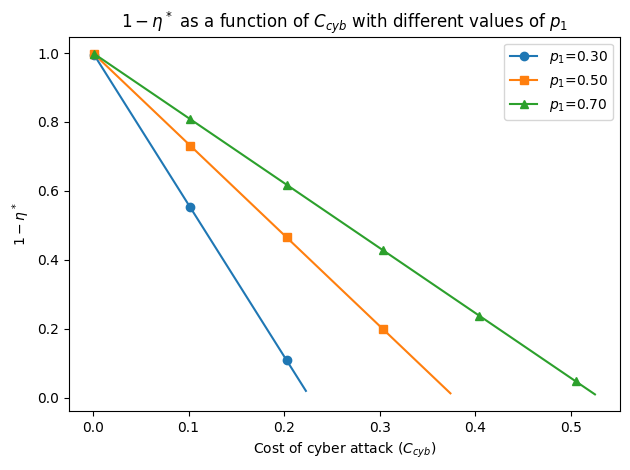

In [ ]:
def plot_one_minus_eta_vs_C_cyb():
    # Define sample p1 values and markers for plotting
    p1_values = [0.3, 0.5, 0.7]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$1-\eta^*$ as a function of $C_{cyb}$ with different values of $p_1$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999)
    }

    C_cyb_range = np.linspace(0.001, 0.999, 100)

    for i, p_1 in enumerate(p1_values):
        # Set p1 value
        params['p_1'] = p_1

        # Compute x and y values based on parameters
        compute_x_y(params)

        # Set a random delta value within a range
        params['delta'] = random.uniform(params['y_1'] + 0.001, params['x_1'] - 0.001)

        one_minus_eta_values = []

        for C_cyb in C_cyb_range:
            params['C_cyb'] = C_cyb
            if params['beta'] > params['C_cyb'] / params['p_1']:
                compute_lambda(params)
                compute_eta(params)
                one_minus_eta_values.append(1 - params['eta^*'])
            else:
                one_minus_eta_values.append(np.nan)  # Appending NaN for continuity

        # Plot 1 - eta values with a label and marker
        ax.plot(C_cyb_range, one_minus_eta_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Cost of cyber attack $(C_{cyb})$')
    ax.set_ylabel('$1-\eta^*$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_one_minus_eta_vs_C_cyb()

# Proposition 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


def compute_x_y(params):
    params['x^*'] = 1 / (1 + params['w'] * (1 - 2*params['p_1']))
    params['y^*'] = 1 / (1 + params['w'] * (1 - 2*params['p_2']))

def compute_lambda(params):
    numerator = 1 + params['w'] * (1 - 2 * params['p_2']) - 1 / params['delta']
    denominator = 2 * params['w'] * (params['p_1'] - params['p_2'])
    params['lambda_1^_*'] = numerator / denominator

def compute_eta(params):
    params['eta_1^*'] = params['C_cyb'] / (2*params['beta']*(params['p_1']-params['p_2']))

## $\lambda_1^*$ as a function of $\delta$ with different values of $p_1$

In [ ]:
def plot_lambda_vs_delta():
    p1_values = [0.3, 0.4, 0.5]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers
    fig, ax = plt.subplots()
    ax.set_title(r'$\lambda^*_1$ as a function of $\delta$ with different values of $p_1$')
    params['w'] = random.uniform(0.001, 0.999)
    params['beta'] = random.uniform(0.001, 0.999)
    params['C_cyb'] = random.uniform(0.001, 0.999)

    for i, p_1 in enumerate(p1_values):
        params['p_1'] = p_1
        params['p_2'] = random.uniform(0.001, params['p_1']-0.001)
        while params['beta']<=params['C_cyb']/2/(params['p_1']-params['p_2']):
              params['beta'] = random.uniform(0.001, 0.999)
              params['C_cyb'] = random.uniform(0.001, 0.999)

        compute_x_y(params)
        delta_range = np.linspace(params['y^*'] + 0.001, params['x^*'] - 0.001, 150)
        lambda_values = []

        for delta in delta_range:
            params['delta'] = delta
            compute_lambda(params)
            lambda_values.append(params['lambda_1^_*'])

        ax.plot(delta_range, lambda_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)
    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that an insider is malicious ($\delta$)')
    ax.set_ylabel(r'$\lambda^*_1$')

    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_lambda_vs_delta()

## $\lambda_1^*$ as a function of $p_1$ with different values of $\delta$

In [ ]:
def plot_lambda_vs_p1():
    # Define delta values and markers for plotting
    delta_values = [0.6, 0.7, 0.8]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\lambda^*_1$ as a function of $p1$ with different values of $\delta$')

    p1_start = 0.5
    p1_values = np.linspace(p1_start, 0.999, 100)

    # Initialize parameters with random values within a range
    params = {
        'w': 0.9,
        'C_cyb': random.uniform(0.001, 0.999),
        'p_2': 0.001
    }

    for i, delta_ in enumerate(delta_values):
        lambda_values = []
        params['delta'] = delta_

        for p_1 in p1_values:
            params['p_1'] = p_1

            # Set beta within a range based on conditions
            params['beta'] = random.uniform(params['C_cyb'] / 2 / (params['p_1'] - params['p_2']), 0.999)

            compute_x_y(params)

            if not (params['y^*'] < params['delta'] < params['x^*']):
                print("WARN")

            compute_lambda(params)
            lambda_values.append(params['lambda_1^_*'])

        ax.plot(p1_values, lambda_values, label=f"$\\delta$={delta_:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that the malicious insider with proper authentication is detected ($p_1$)')
    ax.set_ylabel('$\lambda^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_lambda_vs_p1()


## $\lambda_1^*$ as a function of $\delta$ with different values of $p_1$

In [ ]:
def plot_lambda_vs_delta():
    p1_values = [0.3, 0.4, 0.5]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers
    fig, ax = plt.subplots()
    ax.set_title('$\lambda^*_1$ as a function of $\delta$ with different values of $p_1$')

    params['w'] = random.uniform(0.001, 0.999)
    params['beta'] = random.uniform(0.001, 0.999)
    params['C_cyb'] = random.uniform(0.001, 0.999)

    for i, p_1 in enumerate(p1_values):
        params['p_1'] = p_1
        params['p_2'] = random.uniform(0.001, params['p_1']-0.001)
        while params['beta']<=params['C_cyb']/2/(params['p_1']-params['p_2']):
              params['beta'] = random.uniform(0.001, 0.999)
              params['C_cyb'] = random.uniform(0.001, 0.999)

        compute_x_y(params)
        delta_range = np.linspace(params['y^*'] + 0.001, params['x^*'] - 0.001, 150)
        lambda_values = []

        for delta in delta_range:
            params['delta'] = delta
            compute_lambda(params)
            lambda_values.append(params['lambda_1^_*'])

        ax.plot(delta_range, lambda_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that an insider is malicious ($\delta$)')
    ax.set_ylabel('$\lambda^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_lambda_vs_delta()

## $\lambda_1^*$ as a function of $\delta$ with different values of $p_2$

In [ ]:
def plot_lambda_vs_delta():
    # Define p2 values and markers for plotting
    p2_values = [0.2, 0.4, 0.6]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\lambda^*_1$ as a function of $\delta$ with different values of $p_2$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999),
        'C_cyb': random.uniform(0.001, 0.999),
        'p_1': 0.8
    }

    for i, p_2 in enumerate(p2_values):
        params['p_2'] = p_2

        # Ensure beta and C_cyb satisfy a condition
        while params['beta'] <= params['C_cyb'] / 2 / (params['p_1'] - params['p_2']):
            params['beta'] = random.uniform(0.001, 0.999)
            params['C_cyb'] = random.uniform(0.001, 0.999)

        compute_x_y(params)

        delta_range = np.linspace(params['y^*'] + 0.001, params['x^*'] - 0.001, 100)
        lambda_values = []

        for delta in delta_range:
            params['delta'] = delta
            compute_lambda(params)
            lambda_values.append(params['lambda_1^_*'])

        ax.plot(delta_range, lambda_values, label=f"$p_2$={p_2:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that an insider is malicious ($\delta$)')
    ax.set_ylabel('$\lambda^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_lambda_vs_delta()

## 1-$\lambda_1^*$ as a function of $\delta$ with different values of $p_2$

In [ ]:

def plot_one_minus_lambda_vs_delta():
    # Define p2 values and markers for plotting
    p2_values = [0.2, 0.4, 0.6]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$1-\lambda^*_1$ as a function of $\delta$ with different values of $p_2$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999),
        'C_cyb': random.uniform(0.001, 0.999),
        'p_1': 0.8
    }

    for i, p_2 in enumerate(p2_values):
        params['p_2'] = p_2

        # Ensure beta and C_cyb satisfy a condition
        while params['beta'] <= params['C_cyb'] / params['p_1']:
            params['beta'] = random.uniform(0.001, 0.999)
            params['C_cyb'] = random.uniform(0.001, 0.999)

        compute_x_y(params)

        delta_range = np.linspace(params['y^*'] + 0.001, params['x^*'] - 0.001, 100)
        one_minus_lambda_values = []

        for delta in delta_range:
            params['delta'] = delta
            compute_lambda(params)
            one_minus_lambda_values.append(1 - params['lambda_1^_*'])

        ax.plot(delta_range, one_minus_lambda_values, label=f"$p_2$={p_2:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Probability that an insider is malicious ($\delta$)')
    ax.set_ylabel('$1-\lambda^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_one_minus_lambda_vs_delta()


## $\eta_1^*$ as a function of $C_{cyb}$ with different values of $p_1$

In [ ]:
def plot_eta_vs_C_cyb():
    # Define p1 values and markers for plotting
    p1_values = [0.3, 0.4, 0.5]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\eta^*_1$ as a function of $C_{cyb}$ with different values of $p_1$')

    # Initialize parameters with random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999)
    }

    C_cyb_range = np.linspace(0.001, 0.15, 150)

    for i, p_1 in enumerate(p1_values):
        params['p_1'] = p_1
        params['p_2'] = random.uniform(0.001, params['p_1'] - 0.001)
        compute_x_y(params)
        params['delta'] = random.uniform(params['y^*'] + 0.001, params['x^*'] - 0.001)
        eta_values = []

        for C_cyb in C_cyb_range:
            params['C_cyb'] = C_cyb
            if params['beta'] > params['C_cyb'] / params['p_1']:
                compute_lambda(params)
                compute_eta(params)
                eta_values.append(params['eta_1^*'])
            else:
                eta_values.append(np.nan)  # Appending NaN so the lengths match

        ax.plot(C_cyb_range, eta_values, label=f"$p_1$={p_1:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Cost of cyber attack $(C_{cyb})$')
    ax.set_ylabel('$\eta^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_eta_vs_C_cyb()

## $\eta_1^*$ as a function of $\beta$ with different values of $C_{{cyb}}$

In [ ]:

def plot_eta_vs_beta_v2():
    # Define C_cyb values and markers for plotting
    C_cybs = [0.1, 0.14, 0.18]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\eta^*_1$ as a function of $\\beta$ with different values of $C_{cyb}$')

    # Initialize parameters with specific values and random values within a range
    params = {
        'p_2': 0.4,
        'p_1': 0.6,
        'w': random.uniform(0.001, 0.999)
    }

    for i, Ccyb in enumerate(C_cybs):
        eta_values = []
        params['C_cyb'] = Ccyb

        # Generate beta values within a specific range
        beta_ranges = np.linspace(params['C_cyb'] / 2 / (params['p_1'] - params['p_2']), 0.999, 150)

        for b in beta_ranges:
            params['beta'] = b
            compute_x_y(params)
            params['delta'] = random.uniform(params['y^*'] + 0.001, params['x^*'] - 0.001)
            compute_eta(params)
            eta_values.append(params['eta_1^*'])

        ax.plot(beta_ranges, eta_values, label=f"$C_{{cyb}}$={Ccyb:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('$\\beta$')
    ax.set_ylabel('$\eta^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_eta_vs_beta_v2()

## $\eta_1^*$ as a function of $C_{cyb}$ with different values of $p_2$

## 1-$\eta_1^*$ as a function of $\beta$ with different values of $C_{{cyb}}$

In [ ]:

def plot_eta_vs_beta_v2():
    # Define C_cyb values and markers for plotting
    C_cybs = [0.1, 0.14, 0.18]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('1-$\eta^*_1$ as a function of $\\beta$ with different values of $C_{cyb}$')

    # Initialize parameters with specific values and random values within a range
    params = {
        'p_2': 0.4,
        'p_1': 0.6,
        'w': random.uniform(0.001, 0.999)
    }

    for i, Ccyb in enumerate(C_cybs):
        eta_values = []
        params['C_cyb'] = Ccyb

        # Generate beta values within a specific range
        beta_ranges = np.linspace(params['C_cyb'] / 2 / (params['p_1'] - params['p_2']), 0.999, 150)

        for b in beta_ranges:
            params['beta'] = b
            compute_x_y(params)
            params['delta'] = random.uniform(params['y^*'] + 0.001, params['x^*'] - 0.001)
            compute_eta(params)
            eta_values.append(1 - params['eta_1^*'])

        ax.plot(beta_ranges, eta_values, label=f"$C_{{cyb}}$={Ccyb:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('$\\beta$')
    ax.set_ylabel('1-$\eta^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_eta_vs_beta_v2()

In [ ]:
def plot_eta_vs_C_cyb_with_p2():
    # Define p2 values and markers for plotting
    p2_values = [0.1, 0.12, 0.14]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$\eta^*_1$ as a function of $C_{cyb}$ with different values of $p_2$')

    # Initialize parameters with specific values and random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999)
    }

    C_cyb_range = np.linspace(0.001, 0.999, 200)

    for i, p_2 in enumerate(p2_values):
        params['p_2'] = p_2
        params['p_1'] = random.uniform(params['p_2'] + 0.001, 0.999)
        compute_x_y(params)
        params['delta'] = random.uniform(params['y^*'] + 0.001, params['x^*'] - 0.001)
        eta_values = []

        for C_cyb in C_cyb_range:
            params['C_cyb'] = C_cyb
            if params['beta'] > params['C_cyb'] / params['p_1']:
                compute_lambda(params)
                compute_eta(params)
                eta_values.append(params['eta_1^*'])
            else:
                eta_values.append(np.nan)  # Appending NaN for continuity

        ax.plot(C_cyb_range, eta_values, label=f"$p_2$={p_2:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Cost of cyber attack $(C_{cyb})$')
    ax.set_ylabel('$\eta^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_eta_vs_C_cyb_with_p2()

## 1-$\eta_1^*$ as a function of $C_{cyb}$ with different values of $p_2$

In [ ]:

def plot_one_minus_eta_vs_C_cyb():
    # Define p2 values and markers for plotting
    p2_values = [0.1, 0.12, 0.14]
    markers = ['o', 's', '^']  # Circle, square, and triangle markers

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    ax.set_title('$1-\eta^*_1$ as a function of $C_{cyb}$ with different values of $p_2$')

    # Initialize parameters with specific values and random values within a range
    params = {
        'w': random.uniform(0.001, 0.999),
        'beta': random.uniform(0.001, 0.999)
    }

    C_cyb_range = np.linspace(0.001, 0.999, 150)

    for i, p_2 in enumerate(p2_values):
        params['p_2'] = p_2
        params['p_1'] = random.uniform(params['p_2'] + 0.001, 0.999)
        compute_x_y(params)
        params['delta'] = random.uniform(params['y^*'] + 0.001, params['x^*'] - 0.001)
        one_minus_eta_values = []

        for C_cyb in C_cyb_range:
            params['C_cyb'] = C_cyb
            if params['beta'] > params['C_cyb'] / params['p_1']:
                compute_lambda(params)
                compute_eta(params)
                one_minus_eta_values.append(1 - params['eta_1^*'])
            else:
                one_minus_eta_values.append(np.nan)  # Appending NaN for continuity

        ax.plot(C_cyb_range, one_minus_eta_values, label=f"$p_2$={p_2:.2f}", marker=markers[i], markevery=10)

    # Set labels and legend for the subplot
    ax.set_xlabel('Cost of cyber attack $(C_{cyb})$')
    ax.set_ylabel('$1-\eta^*_1$')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Seed and call the plot function
random.seed(0)
params = {}
plot_one_minus_eta_vs_C_cyb()

# Proposition 3 and 4

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random
def determine_solution(params):
    k1 = params['beta'] * (2 * params['p_1'] - 1); params['k1']=k1
    k2 = 2 * params['beta'] * (params['p_1'] - params['p_2']);params['k2']=k2
    k3 = params['beta'] * (1 - 2 * params['p_2']);params['k3']=k3
    params['x^*'] = 1 / (1 + params['w'] * (1 - 2 * params['p_1']))

    if params['p_2'] < 0.5:
        if params['delta'] < params['x^*']:
            if params['C_cyb'] > k1: return 'The solution is: '+'B'
            else: return 'The solution is: '+'A'
        else:
            if params['C_cyb'] < k1: return 'No equilibria'
            else: return 'The solution is: '+'C'
    elif params['p_2'] > 0.5:
        if params['delta'] < params['x^*']:
            if params['C_cyb'] < k2: return 'The solution is: '+'D'
            else: return 'The solution is: '+'E'
        else: return "No equilibria"
    return 'Unknown'  # Default, in case some combinations don't fall into the defined categories

In [31]:
params = {}

def get_input(parameter_name):
    value = float(input(f"Enter value for {parameter_name}: "))
    params[parameter_name] = value

# Get values for all parameters
get_input('beta')
get_input('p_1')
get_input('p_2')
get_input('w')
get_input('C_cyb')
get_input('delta')

# Assuming the determine_solution function is already defined elsewhere
determine_solution(params)

Enter value for beta: 0.5
Enter value for p_1: 0.55
Enter value for p_2: 0.49
Enter value for w: 0.68
Enter value for C_cyb: 0
Enter value for delta: 0.8


'The solution is: A'